In [1]:
import pandas as pd
import shelve
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import os

In [2]:
for f in set([f[:-4] for f in os.listdir() if f.startswith('resultados_')]):
    with shelve.open(f) as db:
        print(f, db['nome_fundo'])

resultados_01699688000102.pkl SANTANDER FI IBOVESPA ATIVO INSTITUCIONAL AÇÕES


KeyError: b'nome_fundo'

In [3]:
file = 'resultados_2_12055107000116.pkl'
with shelve.open(file) as db:
    for k in list(db.keys()):
        globals()[k] = db[k]

In [4]:
print(f"""
Fundo: \t\t\t{nome_fundo}
Correlação cte: \t{corr_fazer_nada}
Correlação kalman: \t{corr_kalman.round(4)}
Periodo Observado: \t{data_inicio} - {data_fim}
N obs cotas: \t\t{n_cotas}
N obs alocações: \t{n_alocacoes}
""")


Fundo: 			ALASKA BLACK MASTER FUNDO DE INVESTIMENTO EM AÇÕES - BDR NÍVEL  I
Correlação cte: 	0.6094
Correlação kalman: 	0.9212
Periodo Observado: 	30-09-2010 - 30-11-2017
N obs cotas: 		1802
N obs alocações: 	87



# Ativos sem série de retorno

In [5]:
# agrupa acoes
classes = pd.read_csv("classes_acoes_final.csv", encoding='latin1').apply(lambda i: i.str.strip()).dropna().astype('category')
classes = classes.set_index('index')

Text(0.5, 0.98, '% do PL em ativos com retornos diários desconhecidos')

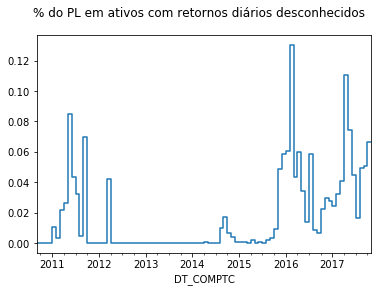

In [6]:
pesos_desconhecidos = pesos.reindex(columns=sem_id)
pesos_desconhecidos.drop(['DISPONIBILIDADES','VALORES A PAGAR','VALORES A RECEBER'], axis=1).sum(1).abs().plot(drawstyle='steps')
plt.suptitle('% do PL em ativos com retornos diários desconhecidos')

In [8]:
sem_id

{'ALIANSCE SHOPPING CENTERS SA',
 'AMBEV S.A.',
 'BOVESPA',
 'BR PROPERTIES SA',
 'BRASKEM S/A',
 'DI1',
 'DISPONIBILIDADES',
 'DOLVFHDH    FHDH',
 'DOLVNJDF    NJDF',
 'DOLVNJDH    NJDH',
 'DOLVNJDJ    NJDJ',
 'DOLVNJDM    NJDM',
 'DOLVNJDS    NJDS',
 'DOLVQJFH    QJFH',
 'DOLVUJFG    UJFG',
 'DOLVUJFH    UJFH',
 'DOLVUJHB    UJHB',
 'DOLVUJHC    UJHC',
 'DOLVVJFM    VJFM',
 'DOLVVJFY    VJFY',
 'EMBRAER SA',
 'FIBRIA CELULOSE S/A',
 'HRT PARTICIPAÇÕES EM PETROLEO S/A',
 'IGUATEMI EMPRESA DE SHOPPING CENTER',
 'IND',
 'ITAU UNIBANCO HOLDING S.A.',
 'KLABIN SA I',
 'LVMGD3',
 'LVMGF0',
 'LVUJF9',
 'MAGAZINE LUIZA',
 'MARCOPOLO (RS)',
 'OGX PETROLEO E GAS PARTICIPACOES S.',
 'OGX PETROLEO E GAS PARTICIPAÇÕES S/',
 'OLCNG8',
 'OLCNJ89',
 'OLCQG8',
 'OLCQG84',
 'OLCUJ9',
 'PCARD06',
 'PETROBRAS',
 'RANDON PARTICIPACOES',
 'SUZANO PAPEL E CELULOSE SA',
 'TITULOS PERPETUOS DE REMUNERACAO VARIAVEL BASEADA ROYALTIES',
 'ULTRAPAR PARTICIPAÇÕES S/A',
 'VALE S/A',
 'VALID SOL E SERV DE SEG EM ME

# Açoes Não classificadas

In [9]:
q = carteira.TP_APLIC.isin(['Ações','Brazilian Depository Receipt - BDR'])
set(pivot_cols[q].str.slice(0,4)) - set(classes.index)

set()

# Gráficos

In [10]:
set(eom_pesos) -  set(retornos_titulos) - set(retornos_futuros) - set(retornos_acoes_empresa) - set(retornos_fundos)

{'Desconhecidos', 'IND'}

In [11]:
pal = ['#8dd3c7','#ffffb3','#bebaacda','#fb8072','#80b1d3','#fdb462','#b3de69','#fccde5','#d9d9d9','#bc80bd','#ccebc5','#ffed6f']
colors = {
     'Bens Industriais': '#8dd3c7',
     'Consumo Cíclico': '#ffffb3',
     'Consumo não Cíclico': '#bebaacda',
     'Financeiro': '#fb8072',
     'Materiais Básicos': '#80b1d3',
     'Petróleo, Gás e Biocombustíveis': '#fdb462',
     'Saúde': '#b3de69',
     'Tecnologia da Informação': '#fccde5',
     'Telecomunicações': '#d9d9d9',
     'Utilidade Pública': '#bc80bd',
     'Títulos Públicos': 'navy',
     'Futuros': '#ffed6f',
     'Outros Fundos': '#BCD8C1',
     'Desconhecidos': 'lightgray'}

In [12]:
## Portfólio Reportado

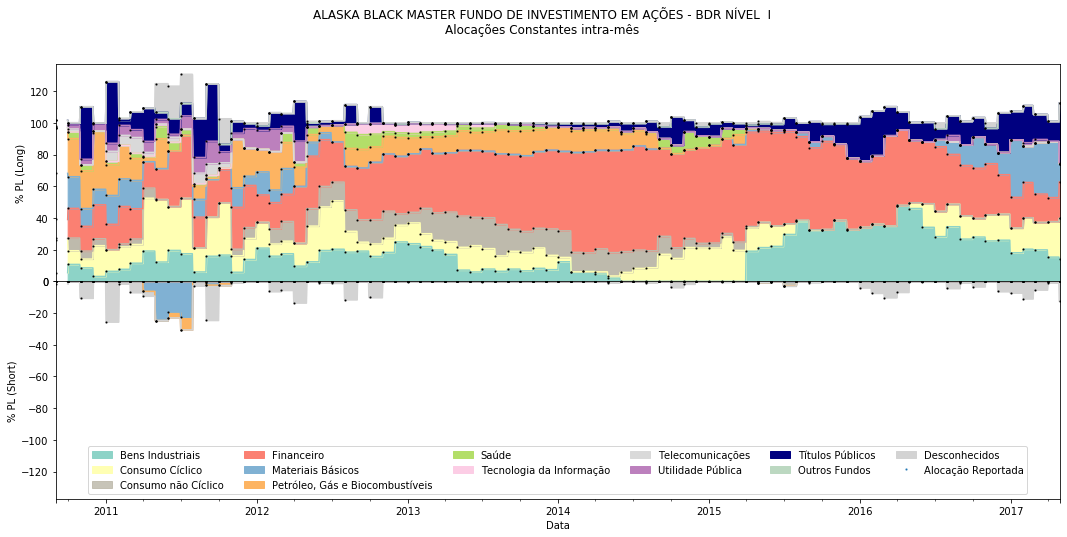

In [13]:
acoes = eom_pesos.groupby(classes['Setor'].to_dict(), axis=1).sum()
titulos = pd.Series(eom_pesos.loc[:,retornos_titulos].sum(1), name='Títulos Públicos')
#futuros =  pd.Series(eom_pesos.loc[:,retornos_futuros].sum(1), name='Futuros')
outros_fundos =  pd.Series(eom_pesos.loc[:,retornos_fundos].sum(1), name='Outros Fundos')
plot_data = pd.concat([
    acoes,
    titulos,
#    futuros,
    outros_fundos,
    eom_pesos['Desconhecidos']
], axis=1).mul(100).resample('D').bfill().loc[:'2017-05-01']


color_list = plot_data.columns.map(colors.get)

fig, (axu, axd) = plt.subplots(2, gridspec_kw=dict(hspace=0), figsize=(18, 8))
plot_data[(plot_data > 0)].fillna(0).plot.area(ax=axu, legend=None, alpha=1, color=color_list)
plot_data[(plot_data < 0)].fillna(0).plot.area(ax=axd, color=color_list)

plot_data[(plot_data > 0)].fillna(0).resample('M').first().plot(ax=axu, legend=None, color='k', ls='', marker='x', markersize=1.5, stacked=True)
plot_data[(plot_data < 0)].fillna(0).resample('M').first().plot(ax=axd, legend=None, color='k', ls='', marker='x', markersize=1.5, stacked=True)

axu.set_xticks([])
axd.set_ylim(-axu.get_ylim()[1], 0)
axu.set_ylabel('% PL (Long)')
axd.set_ylabel('% PL (Short)')
axd.set_xlabel('Data')

handles, labels = axd.get_legend_handles_labels()

handles.extend([mlines.Line2D([], [], marker='x', markersize=1.5, ls='')])
labels.extend(['Alocação Reportada'])

axd.legend(handles[13:], labels[13:], ncol=6, loc=8)

fig.suptitle(f"{nome_fundo}\nAlocações Constantes intra-mês");

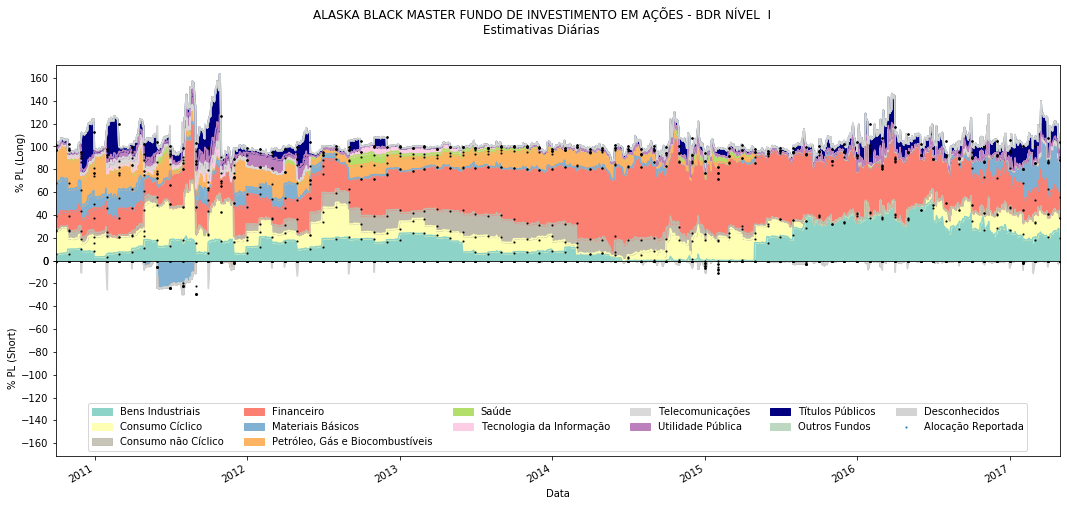

In [14]:
acoes = estimativas.groupby(classes['Setor'].to_dict(), axis=1).sum()
titulos = pd.Series(estimativas.loc[:,retornos_titulos].sum(1), name='Títulos Públicos')
#futuros =  pd.Series(estimativas.loc[:,retornos_futuros].sum(1), name='Futuros')
outros_fundos =  pd.Series(estimativas.loc[:,retornos_fundos].sum(1), name='Outros Fundos')
plot_data = pd.concat([
    acoes,
    titulos,
#    futuros,
    outros_fundos,
    eom_pesos['Desconhecidos']
], axis=1).mul(100).loc[:'2017-05-01']


color_list = plot_data.columns.map(colors.get)

fig, (axu, axd) = plt.subplots(2, gridspec_kw=dict(hspace=0), figsize=(18, 8))
plot_data[(plot_data > 0)].fillna(0).plot.area(ax=axu, legend=None, alpha=1, color=color_list)
plot_data[(plot_data < 0)].fillna(0).plot.area(ax=axd, color=color_list)

plot_data[(plot_data > 0)].fillna(0).resample('M').first().plot(ax=axu, legend=None, color='k', ls='', marker='x', markersize=1.5, stacked=True)
plot_data[(plot_data < 0)].fillna(0).resample('M').first().plot(ax=axd, legend=None, color='k', ls='', marker='x', markersize=1.5, stacked=True)

axu.set_xticks([])
axd.set_ylim(-axu.get_ylim()[1], 0)
axu.set_ylabel('% PL (Long)')
axd.set_ylabel('% PL (Short)')
axd.set_xlabel('Data')

handles, labels = axd.get_legend_handles_labels()

handles.extend([mlines.Line2D([], [], marker='x', markersize=1.5, ls='')])
labels.extend(['Alocação Reportada'])

axd.legend(handles[13:], labels[13:], ncol=6, loc=8)

fig.suptitle(f"{nome_fundo}\nEstimativas Diárias");